In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("bmi_class.csv")

In [ ]:
df.head()

,Weight,Height,class
0,58,180,Underweight
1,64,183,Normal
2,51,167,Underweight
3,60,163,Normal
4,76,188,Normal


In [ ]:
df.tail()

,Weight,Height,class
195,64,173,Normal
196,47,163,Underweight
197,80,188,Normal
198,57,164,Normal
199,69,186,Normal


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Weight  200 non-null    int64 
 1   Height  200 non-null    int64 
 2   class   200 non-null    object
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


In [ ]:
df.describe()

,Weight,Height
count,200.000000,200.000000
mean,64.025000,175.685000
std,9.332193,9.363984
min,45.000000,160.000000
25%,57.000000,167.000000
50%,63.000000,176.500000
75%,71.000000,184.000000
max,86.000000,190.000000


In [ ]:
df.isnull().sum()

Weight    0
Height    0
class     0
dtype: int64

In [ ]:
df.columns

Index(['Weight', 'Height', 'class'], dtype='object')

In [ ]:
x=df.drop('class',axis=1)
y=df['class']

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
x[0:4]

array([[-0.64723472,  0.46196449],
       [-0.00268562,  0.78314491],
       [-1.39920866, -0.9298173 ],
       [-0.43238502, -1.35805785]])

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 2)
(160,)
(40, 2)
(40,)


In [45]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
y_pred=model.predict(x_test)

In [47]:
y_pred[0:10]

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Underweight', 'Normal'], dtype=object)

In [48]:
y_test[0:10]

143         Normal
81          Normal
26          Normal
150    Underweight
124         Normal
24          Normal
126         Normal
142         Normal
129    Underweight
171         Normal
Name: class, dtype: object

In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.95


In [50]:
model.score(x_test,y_test)

0.95

In [51]:
model.score(x_train,y_train)

0.98125

In [52]:
for i in range (3,46,2):
    print("where k=",i)
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    print("Train score :",model.score(x_train,y_train))
    print("Test score :",model.score(x_test,y_test))
    print('--------------------')
    

where k= 3
Train score : 0.98125
Test score : 0.95
--------------------
where k= 5
Train score : 0.98125
Test score : 0.95
--------------------
where k= 7
Train score : 0.9875
Test score : 0.925
--------------------
where k= 9
Train score : 0.9875
Test score : 0.9
--------------------
where k= 11
Train score : 0.9625
Test score : 0.925
--------------------
where k= 13
Train score : 0.95
Test score : 0.9
--------------------
where k= 15
Train score : 0.93125
Test score : 0.875
--------------------
where k= 17
Train score : 0.9125
Test score : 0.875
--------------------
where k= 19
Train score : 0.90625
Test score : 0.85
--------------------
where k= 21
Train score : 0.88125
Test score : 0.825
--------------------
where k= 23
Train score : 0.875
Test score : 0.875
--------------------
where k= 25
Train score : 0.825
Test score : 0.875
--------------------
where k= 27
Train score : 0.825
Test score : 0.825
--------------------
where k= 29
Train score : 0.81875
Test score : 0.825
---------

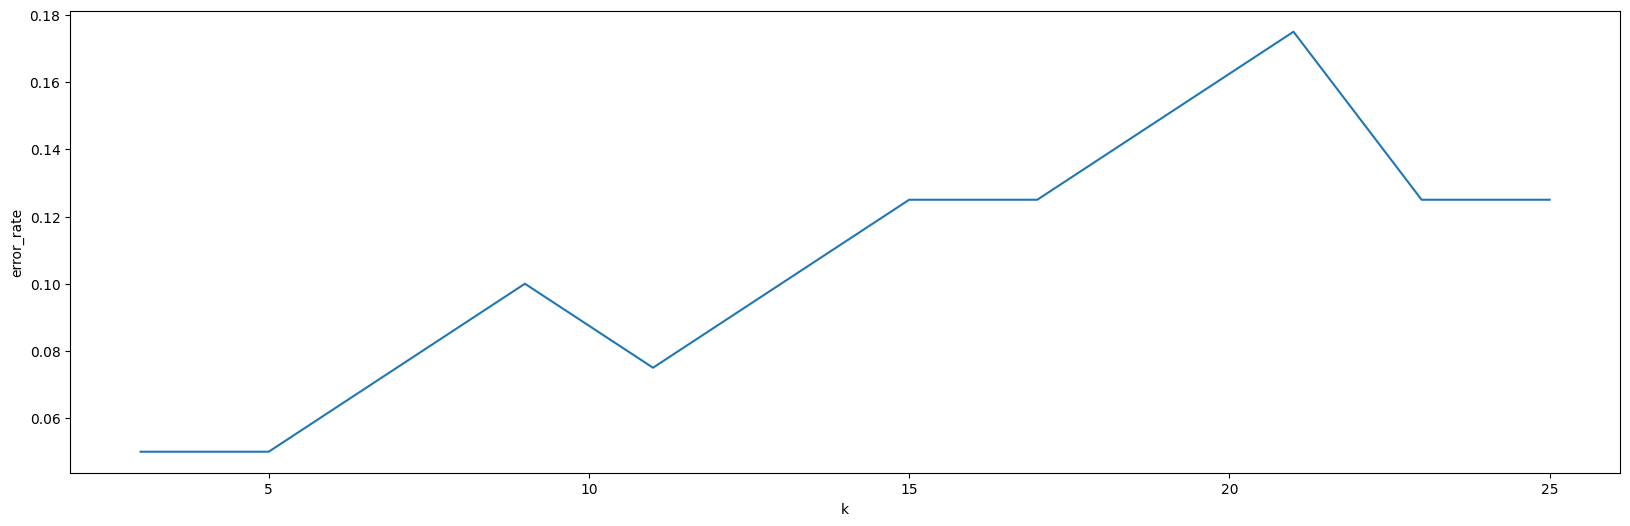

In [53]:
error_rate=[]
for i in range (3,27,2):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
plt.figure(figsize=(20,6))
plt.plot(range(3,27,2),error_rate)
plt.xlabel("k")
plt.ylabel("error_rate")
plt.show()

In [54]:
from sklearn.neighbors import KNeighborsClassifier
BMI=KNeighborsClassifier(n_neighbors=3)
BMI.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
y_pred=model.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100," % Accuracy")

87.5  % Accuracy


In [57]:
pd.crosstab(y_test,y_pred)

col_0,Normal,Underweight
class,,
Normal,33,0
Underweight,5,2


In [58]:
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])

Predicted,Normal,Underweight
Actual,,
Normal,33,0
Underweight,5,2


In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[33  0]
 [ 5  2]]


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.87      1.00      0.93        33
 Underweight       1.00      0.29      0.44         7

    accuracy                           0.88        40
   macro avg       0.93      0.64      0.69        40
weighted avg       0.89      0.88      0.84        40



In [61]:
import pickle

with open("bmi_class.pkl", "wb") as model_file:
    pickle.dump(BMI, model_file)